In [1]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the data in from the google drive into a dataframe

#data_dir = Crash_Reporting_-_Drivers_Data.csv"
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")
df.head()


C:\Users\saisu\AppData\Local\Temp\ipykernel_19352\3736114735.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


In [3]:
#Set seaborn figure size
sns.set(rc={'figure.figsize':(12,9)})


In [4]:
#First we will convert the dates to pandas datetime so we can later use the dates and time for further analysis. Then we sort the date in ascending order

df.index = pd.to_datetime(df['Crash Date/Time'])
df = df.sort_index()
df['Crash Date/Time']

C:\Users\saisu\AppData\Local\Temp\ipykernel_19352\3117325002.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df['Crash Date/Time'])


Crash Date/Time
2015-01-01 00:30:00    01/01/2015 12:30:00 AM
2015-01-01 00:30:00    01/01/2015 12:30:00 AM
2015-01-01 01:10:00    01/01/2015 01:10:00 AM
2015-01-01 01:10:00    01/01/2015 01:10:00 AM
2015-01-01 01:14:00    01/01/2015 01:14:00 AM
                                ...          
2025-04-15 19:09:00    04/15/2025 07:09:00 PM
2025-04-15 19:09:00    04/15/2025 07:09:00 PM
2025-04-15 19:09:00    04/15/2025 07:09:00 PM
2025-04-16 08:01:00    04/16/2025 08:01:00 AM
2025-04-16 08:01:00    04/16/2025 08:01:00 AM
Name: Crash Date/Time, Length: 195411, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195411 entries, 2015-01-01 00:30:00 to 2025-04-16 08:01:00
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  195411 non-null  object 
 1   Local Case Number              195411 non-null  object 
 2   Agency Name                    195411 non-null  object 
 3   ACRS Report Type               195411 non-null  object 
 4   Crash Date/Time                195411 non-null  object 
 5   Route Type                     176321 non-null  object 
 6   Road Name                      174365 non-null  object 
 7   Cross-Street Name              164809 non-null  object 
 8   Off-Road Description           18052 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6301 non-null    object 
 11  Collision Type                 194826 non-null  object 
 

In [6]:
df.isna().sum().sort_values(ascending=False)/len(df)

Non-Motorist Substance Abuse     0.973620
Related Non-Motorist             0.967755
Off-Road Description             0.907620
Municipality                     0.902124
Circumstance                     0.809340
Driver Substance Abuse           0.160278
Cross-Street Name                0.156603
Traffic Control                  0.140949
Surface Condition                0.114287
Road Name                        0.107701
Route Type                       0.097692
Weather                          0.068348
Drivers License State            0.064352
Vehicle Going Dir                0.034307
Vehicle Body Type                0.014979
Driver Distracted By             0.008178
Parked Vehicle                   0.007814
Injury Severity                  0.007569
Light                            0.007395
Vehicle Movement                 0.005870
Vehicle Model                    0.003577
Vehicle Make                     0.003362
Collision Type                   0.002994
Vehicle Damage Extent            0

In [7]:
df.select_dtypes(include='object').apply(lambda x: x.eq('')).sum()

Report Number                    0
Local Case Number                0
Agency Name                      0
ACRS Report Type                 0
Crash Date/Time                  0
Route Type                       0
Road Name                        0
Cross-Street Name                0
Off-Road Description             0
Municipality                     0
Related Non-Motorist             0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Non-Motorist Substance Abuse     0
Person ID                        0
Driver At Fault                  0
Injury Severity                  0
Circumstance                     0
Driver Distracted By             0
Drivers License State            0
Vehicle ID                       0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Vehicle Movement    

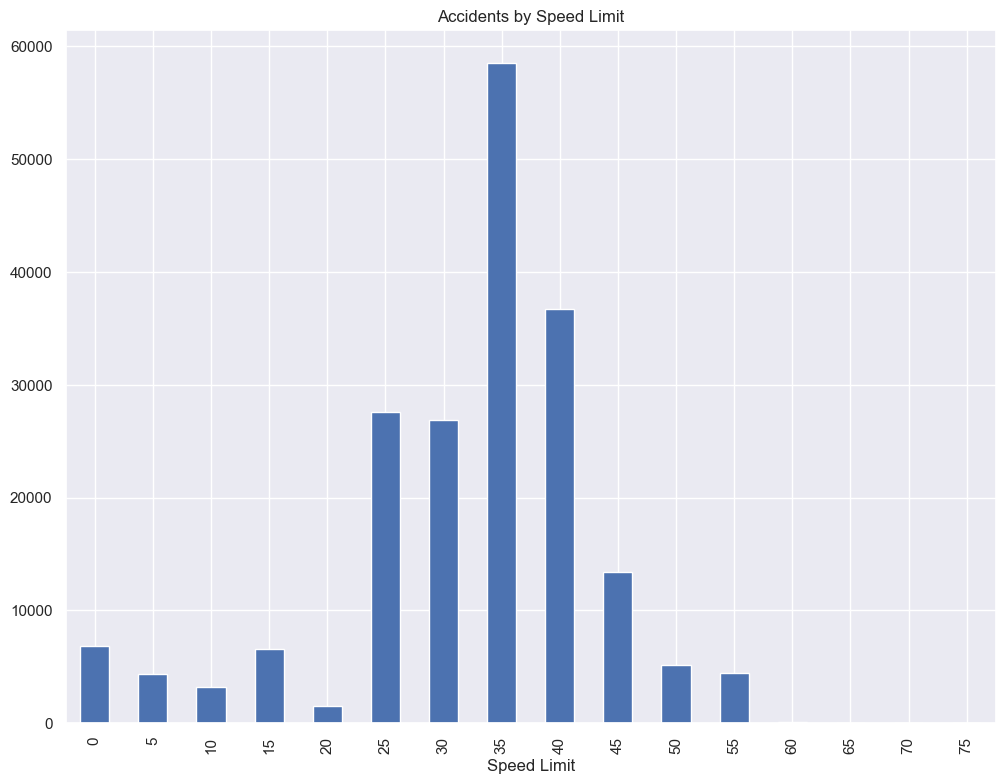

In [7]:
df['Speed Limit'].value_counts().sort_index().plot.bar().set(title='Accidents by Speed Limit');

In [8]:
df.drop(['Non-Motorist Substance Abuse','Related Non-Motorist','Off-Road Description','Municipality','Circumstance'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195411 entries, 2015-01-01 00:30:00 to 2025-04-16 08:01:00
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  195411 non-null  object 
 1   Local Case Number              195411 non-null  object 
 2   Agency Name                    195411 non-null  object 
 3   ACRS Report Type               195411 non-null  object 
 4   Crash Date/Time                195411 non-null  object 
 5   Route Type                     176321 non-null  object 
 6   Road Name                      174365 non-null  object 
 7   Cross-Street Name              164809 non-null  object 
 8   Collision Type                 194826 non-null  object 
 9   Weather                        182055 non-null  object 
 10  Surface Condition              173078 non-null  object 
 11  Light                          193966 non-null  object 
 

In [10]:
df.replace(['UNKNOWN','Unknown','OTHER'],np.nan,inplace=True)

In [11]:
df.isna().sum().sort_values(ascending=False)/len(df)

Driver Substance Abuse           0.221937
Driver Distracted By             0.204078
Cross-Street Name                0.156603
Traffic Control                  0.152596
Surface Condition                0.117731
Road Name                        0.107701
Collision Type                   0.104948
Route Type                       0.097794
Weather                          0.074494
Drivers License State            0.064352
Vehicle Going Dir                0.063200
Vehicle Damage Extent            0.036016
Vehicle Body Type                0.028816
Vehicle Model                    0.026472
Vehicle Movement                 0.024891
Driver At Fault                  0.023960
Vehicle Make                     0.022558
Vehicle First Impact Location    0.016570
Light                            0.013014
Parked Vehicle                   0.007814
Injury Severity                  0.007569
Driverless Vehicle               0.003812
Longitude                        0.000000
Vehicle Year                     0

In [12]:
df.drop(['Report Number','Local Case Number','Agency Name','ACRS Report Type','Route Type','Cross-Street Name','Surface Condition','Light','Person ID','Driver At Fault','Drivers License State',
         'Vehicle ID','Vehicle First Impact Location','Vehicle Body Type','Vehicle Going Dir','Driverless Vehicle','Parked Vehicle','Vehicle Year',
         'Latitude','Longitude','Location','Vehicle Model','Vehicle Movement'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195411 entries, 2015-01-01 00:30:00 to 2025-04-16 08:01:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crash Date/Time         195411 non-null  object
 1   Road Name               174365 non-null  object
 2   Collision Type          174903 non-null  object
 3   Weather                 180854 non-null  object
 4   Traffic Control         165592 non-null  object
 5   Driver Substance Abuse  152042 non-null  object
 6   Injury Severity         193932 non-null  object
 7   Driver Distracted By    155532 non-null  object
 8   Vehicle Damage Extent   188373 non-null  object
 9   Speed Limit             195411 non-null  int64 
 10  Vehicle Make            191003 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.9+ MB


In [14]:
df['Vehicle Make'].replace(['TOYT','HOND','CHEV','CHEVY','NISS','HYUN','MERZ','VOLK','ACUR','DODG','SUBA','MAZD','CHRY','THOM','LEXS','MITS','LEXU','FRHT','CADI','VW','VOLKSWAGON','VOLK','VOLV','CADILAC'],
['TOYOTA','HONDA','CHEVROLET','CHEVROLET','NISSAN','HYUNDAI','MERCEDES','VOlKSWAGEN','ACURA','DODGE','SUBARU','MAZDA','CHRYSLER','THOMAS','LEXUS','MITSUBISHI','LEXUS','FREIGHTLINER','CADILLAC','VOLKSWAGEN','VOLKSWAGEN','VOLKSWAGEN','VOLVO','CADILLAC'],inplace=True)

C:\Users\saisu\AppData\Local\Temp\ipykernel_19352\791317965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle Make'].replace(['TOYT','HOND','CHEV','CHEVY','NISS','HYUN','MERZ','VOLK','ACUR','DODG','SUBA','MAZD','CHRY','THOM','LEXS','MITS','LEXU','FRHT','CADI','VW','VOLKSWAGON','VOLK','VOLV','CADILAC'],


In [15]:
substanceAbuse = df['Driver Substance Abuse'].values
substanceAbuse2 = np.where((substanceAbuse!='NONE DETECTED') & (substanceAbuse=='ALCOHOL PRESENT') |  (substanceAbuse=='ALCOHOL CONTRIBUTED')|  (substanceAbuse=='ILLEGAL DRUG PRESENT')|(substanceAbuse=='ILLEGAL DRUG CONTRIBUTED')|(substanceAbuse=='COMBINED SUBSTANCE PRESENT')
|(substanceAbuse=='MEDICATION CONTRIBUTED')|(substanceAbuse=='COMBINATION CONTRIBUTED')|(substanceAbuse=='MEDICATION PRESENT'),'DETECTED',substanceAbuse)
df['new_Driver Substance Abuse']=substanceAbuse2

In [16]:
df['hour'] = df.index.hour

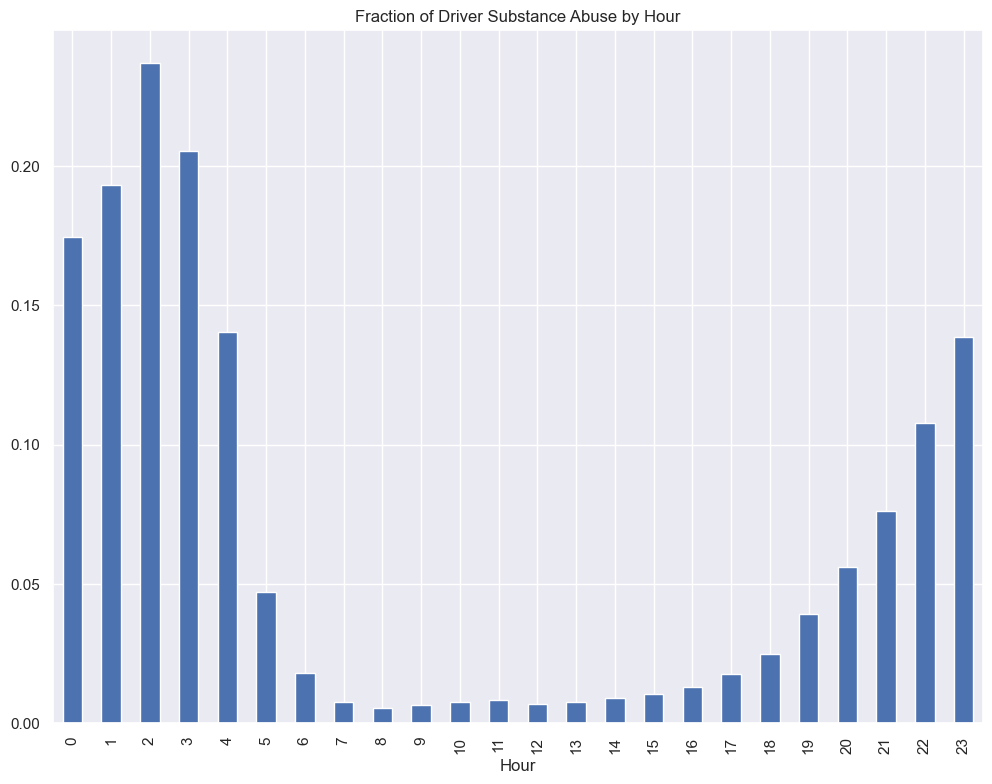

In [17]:
df7=df

clear_by_coll_type = df7.groupby('hour')['new_Driver Substance Abuse'].apply(lambda x: (x == 'DETECTED').mean())
clear_by_coll_type.plot.bar().set(xlabel='Hour', title='Fraction of Driver Substance Abuse by Hour');


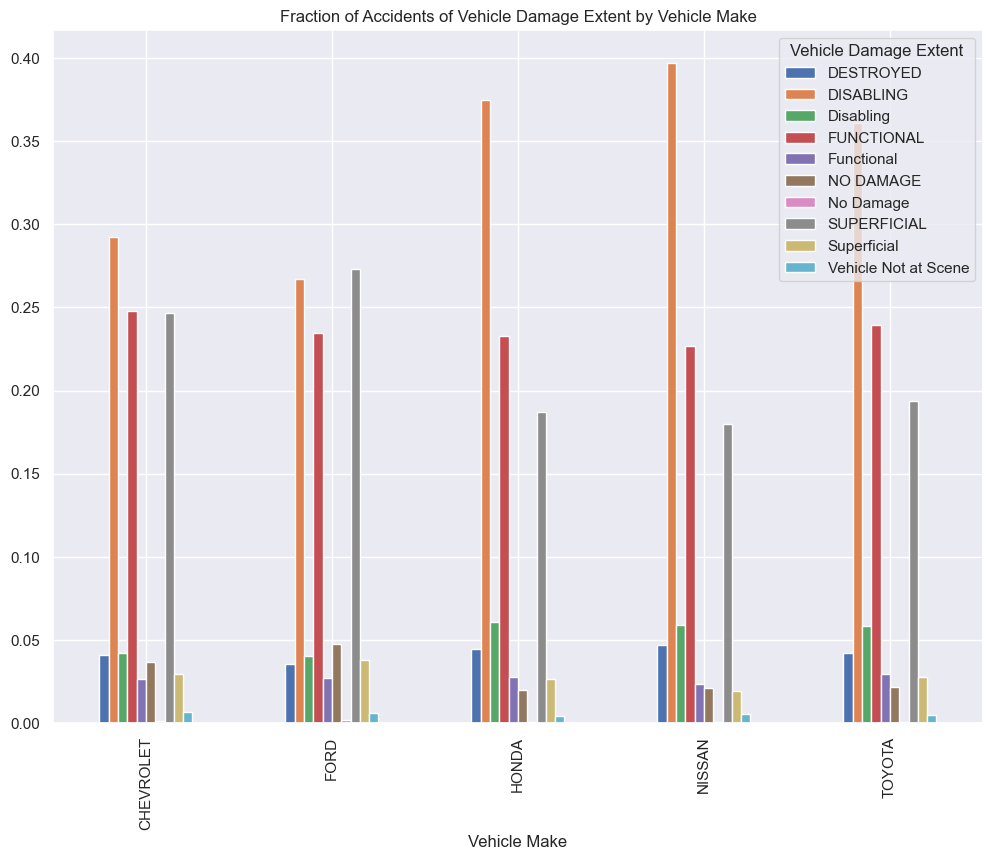

In [18]:
df3=df
top_var1 = df3['Vehicle Make'].value_counts()[0:5].index
df3 = df3[df3['Vehicle Make'].isin(top_var1)]
tb1 = pd.crosstab(df3['Vehicle Make'],df3['Vehicle Damage Extent'])
tb1 = tb1.div(df3['Vehicle Make'].value_counts(), axis=0)
tb1.plot.bar().set(xlabel='Vehicle Make',title='Fraction of Accidents of Vehicle Damage Extent by Vehicle Make');

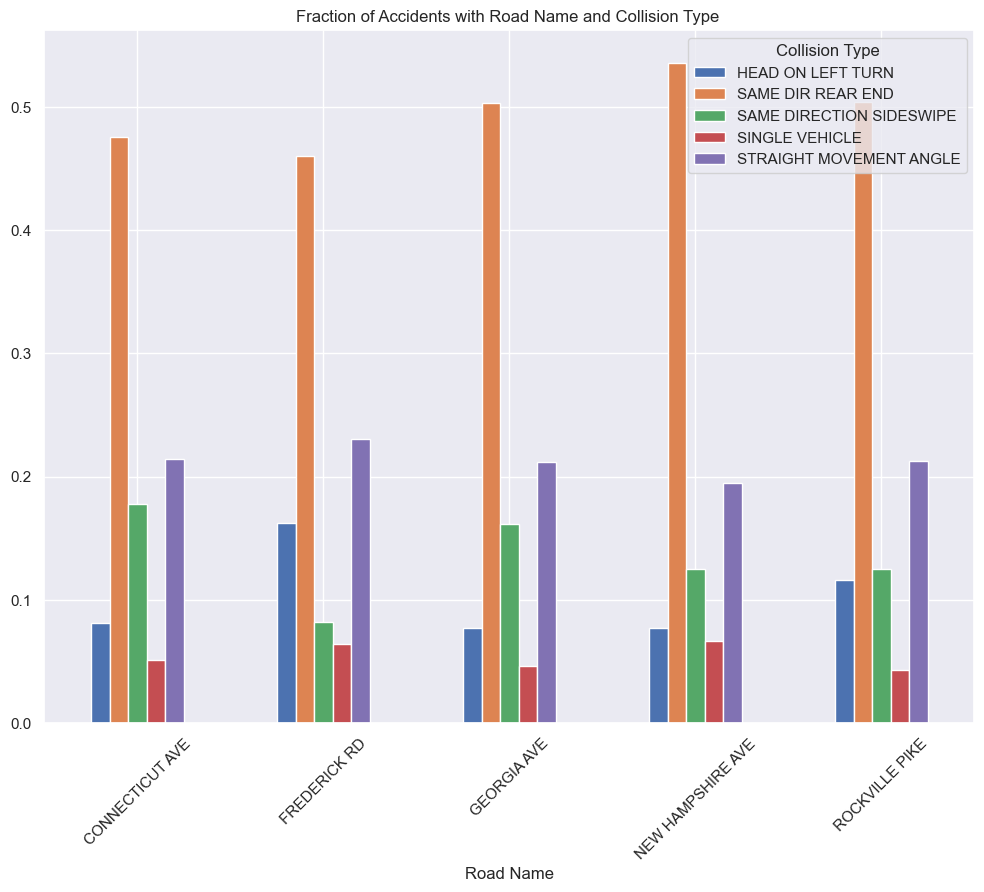

In [19]:
df12=df
top_var1 = df12['Road Name'].value_counts()[0:5].index
df12 = df12[df12['Road Name'].isin(top_var1)]

top_var2 = df12['Collision Type'].value_counts()[:5].index
df12 = df12[df12['Collision Type'].isin(top_var2)]

tb1 = pd.crosstab(df12['Road Name'],df12['Collision Type'])
tb1 = tb1.div(df12['Road Name'].value_counts(), axis=0)
tb1.plot(kind='bar').set(xlabel='Road Name',title='Fraction of Accidents with Road Name and Collision Type ')
plt.xticks(rotation=45);

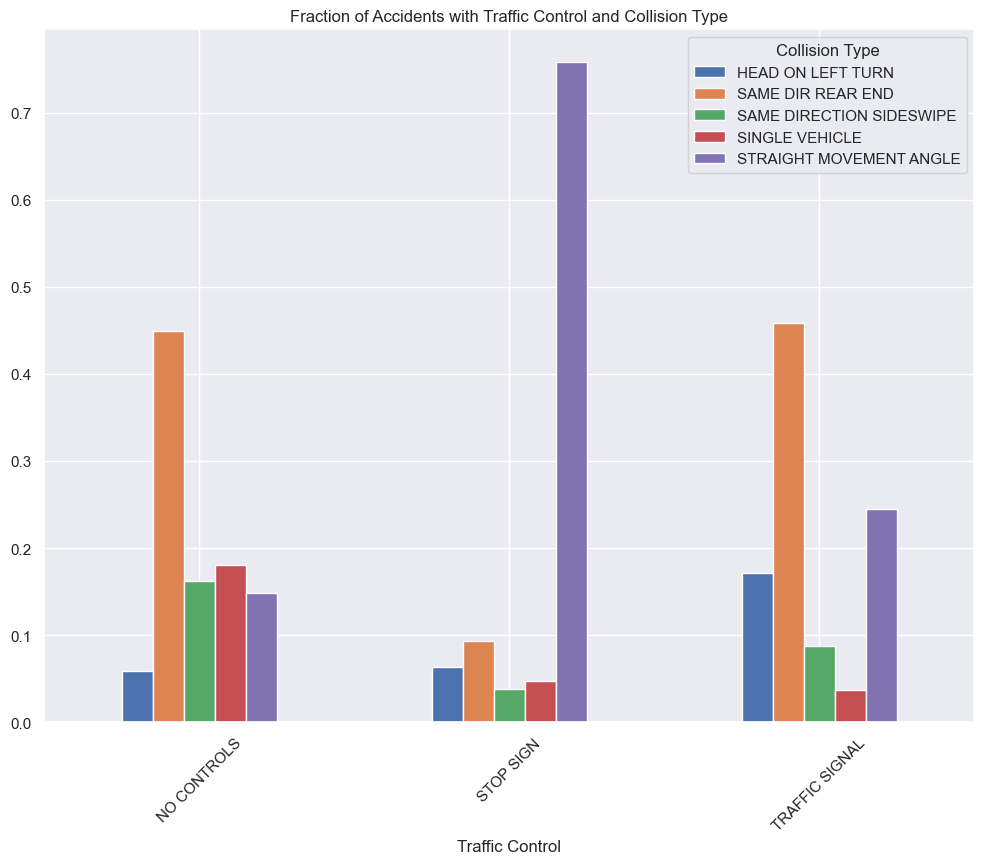

In [23]:
df13=df
top_var1 = df13['Traffic Control'].value_counts()[0:5].index
df13 = df13[df13['Traffic Control'].isin(top_var1)]

top_var2 = df13['Collision Type'].value_counts()[:5].index
df13 = df13[df13['Collision Type'].isin(top_var2)]

tb1 = pd.crosstab(df13['Traffic Control'],df13['Collision Type'])
tb1 = tb1.div(df13['Traffic Control'].value_counts(), axis=0)
tb1.plot(kind='bar').set(xlabel='Traffic Control',title='Fraction of Accidents with Traffic Control and Collision Type')
plt.xticks(rotation=45);

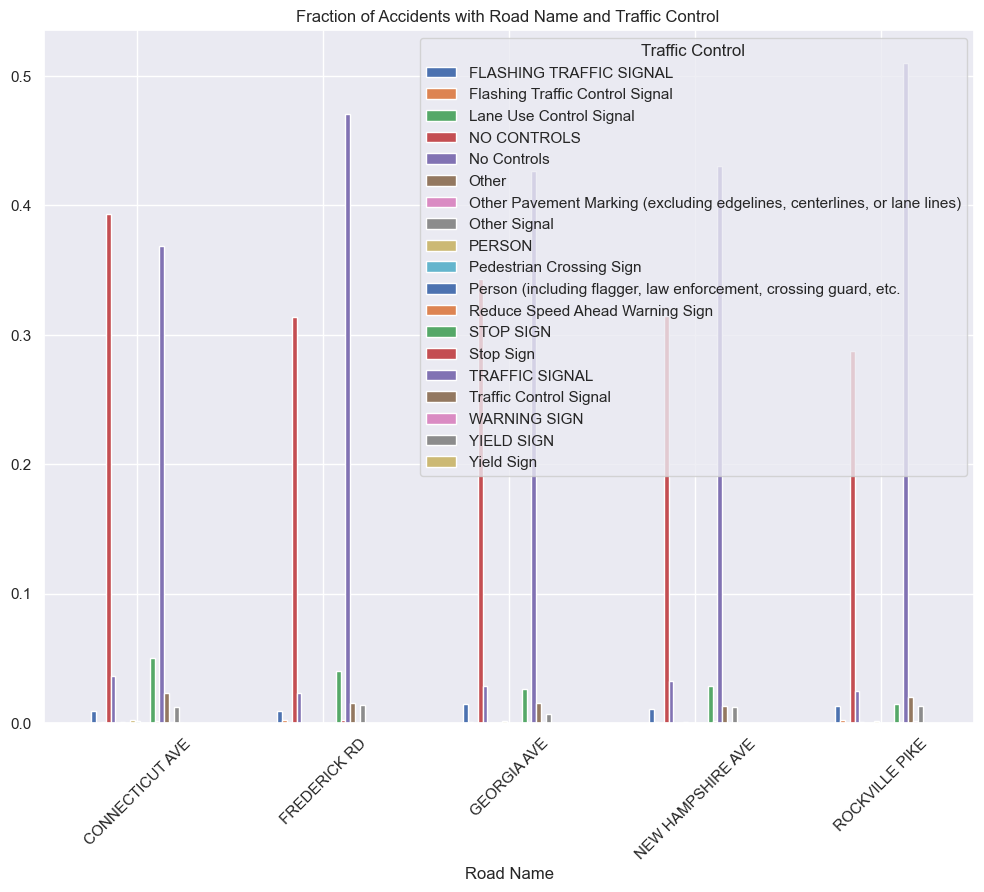

In [20]:
df4=df
top_var1 = df4['Road Name'].value_counts()[0:5].index
df4 = df4[df['Road Name'].isin(top_var1)]
tb1 = pd.crosstab(df4['Road Name'],df4['Traffic Control'])
tb1 = tb1.div(df4['Road Name'].value_counts(), axis=0)
tb1.plot(kind='bar').set(xlabel='Road Name',title='Fraction of Accidents with Road Name and Traffic Control ')
plt.xticks(rotation=45);

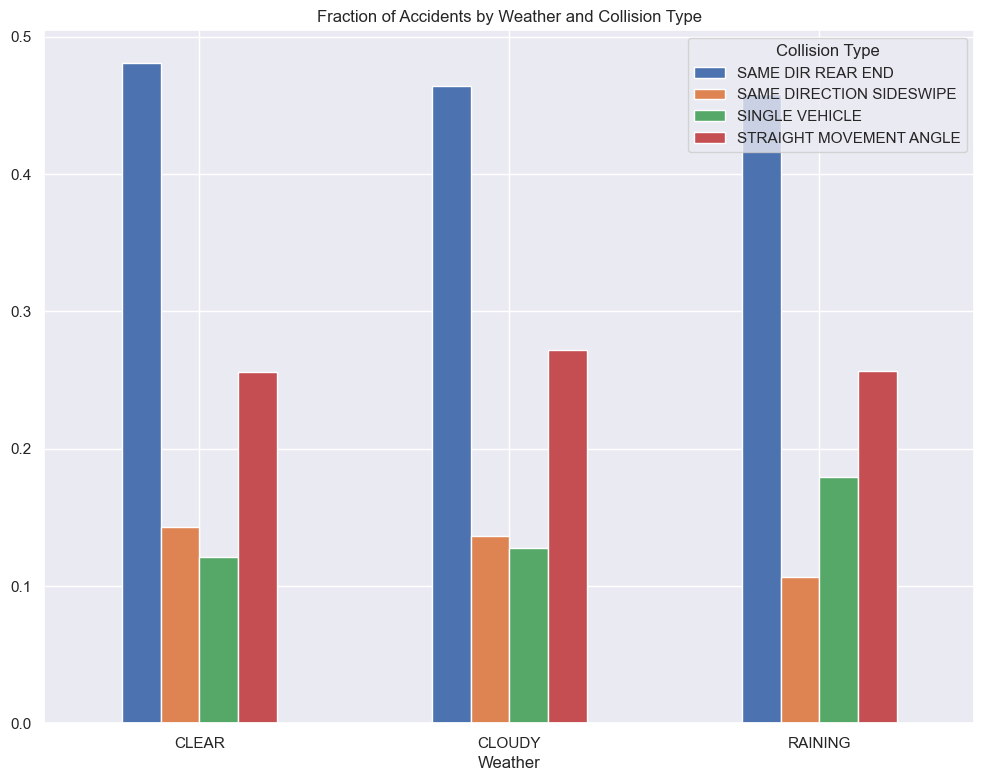

In [21]:
df7=df

top_var1 = df7['Weather'].value_counts()[:5].index
df7 = df7[df7['Weather'].isin(top_var1)]

top_var2 = df7['Collision Type'].value_counts()[:4].index
df7 = df7[df7['Collision Type'].isin(top_var2)]

tb1 = pd.crosstab(df7['Weather'],df7['Collision Type'])
tb1 = tb1.div(df7['Weather'].value_counts(), axis=0)
tb1.plot.bar().set(xlabel='Weather', title='Fraction of Accidents by Weather and Collision Type')
plt.xticks(rotation=360);

In [22]:
df['Injury Severity'].value_counts().sort_index()

Injury Severity
FATAL INJURY                   154
Fatal Injury                    25
NO APPARENT INJURY          141196
No Apparent Injury           18094
POSSIBLE INJURY              17481
Possible Injury               1539
SUSPECTED MINOR INJURY       11871
SUSPECTED SERIOUS INJURY      1414
Suspected Minor Injury        1973
Suspected Serious Injury       185
Name: count, dtype: int64

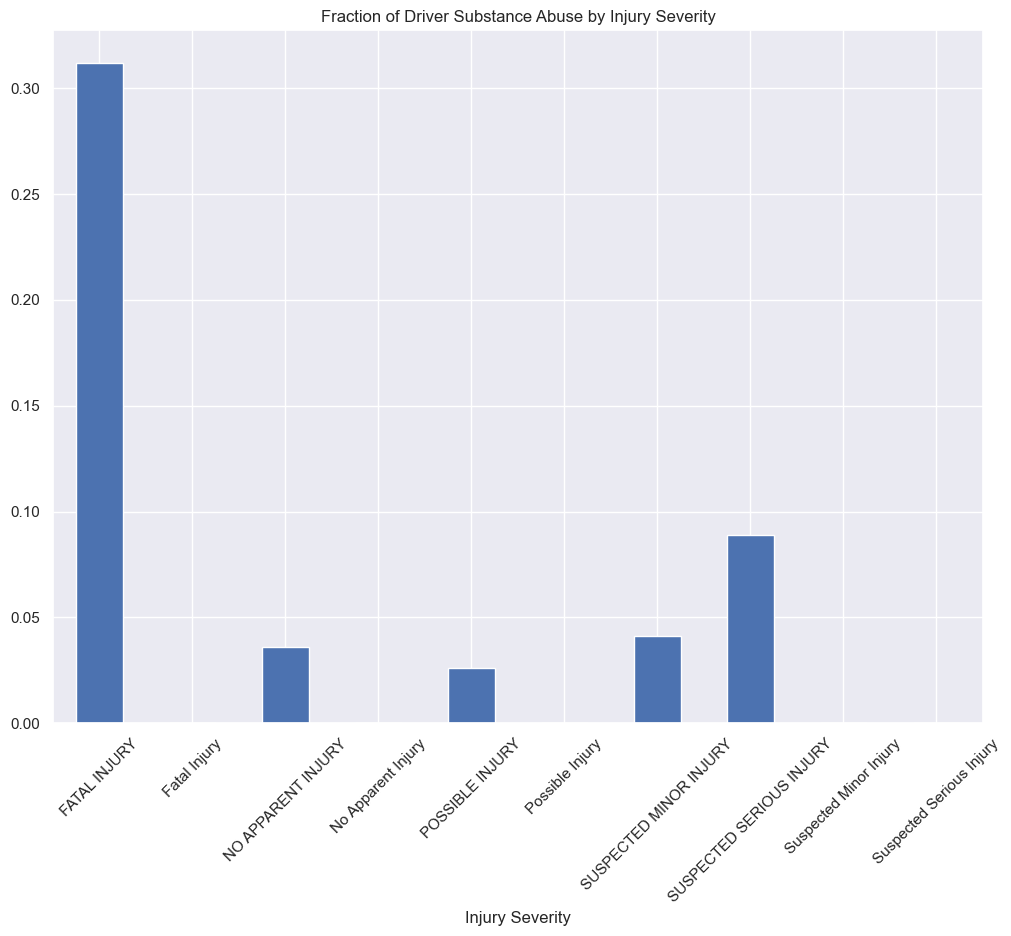

In [23]:
df9=df
clear_by_coll_type = df9.groupby('Injury Severity')['new_Driver Substance Abuse'].apply(lambda x: (x == 'DETECTED').mean())
clear_by_coll_type.plot.bar().set(xlabel='Injury Severity', title='Fraction of Driver Substance Abuse by Injury Severity')
plt.xticks(rotation=45);

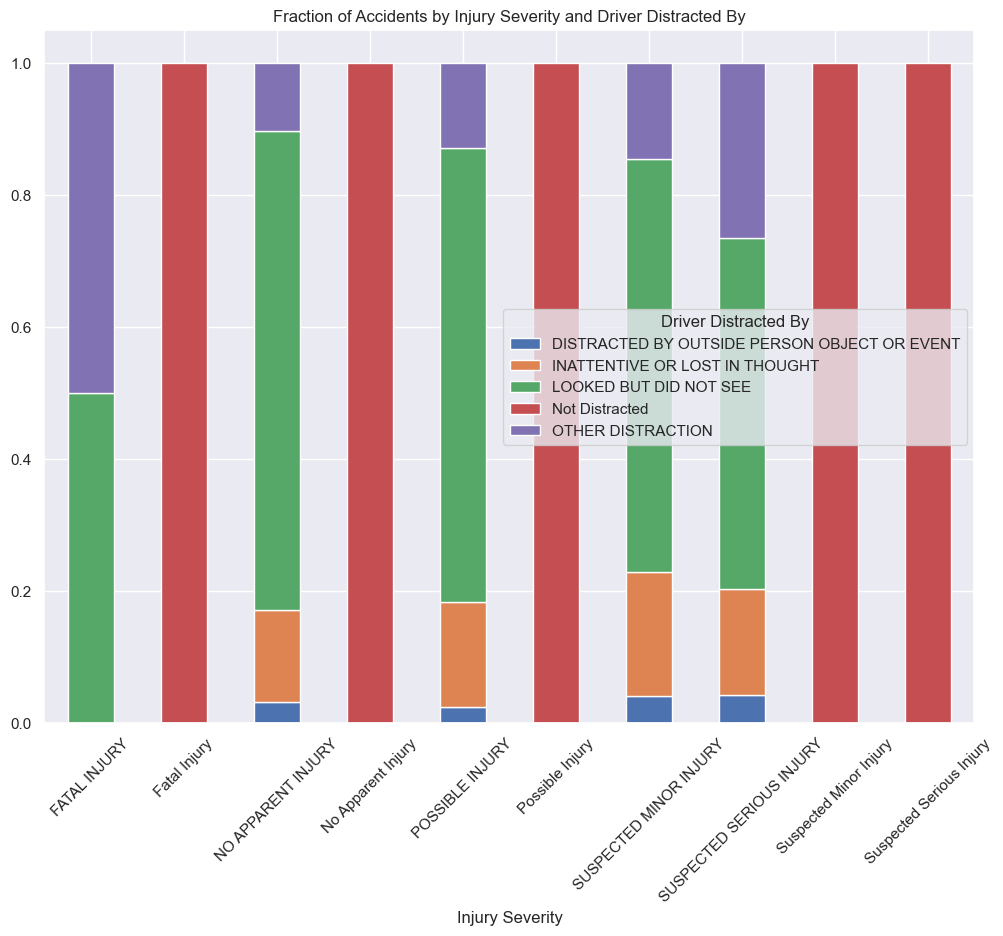

In [24]:
df15=df
top_var1 = df15['Injury Severity'].value_counts().index
df15 = df15[df15['Injury Severity'].isin(top_var1)]

top_var2 = df15['Driver Distracted By'].value_counts()[1:6].index
df15 = df15[df15['Driver Distracted By'].isin(top_var2)]

tb1 = pd.crosstab(df15['Injury Severity'],df15['Driver Distracted By'])
tb1 = tb1.div(df15['Injury Severity'].value_counts(), axis=0)
tb1.plot.bar(stacked=True).set(title='Fraction of Accidents by Injury Severity and Driver Distracted By',xlabel='Injury Severity')
plt.xticks(rotation=45);

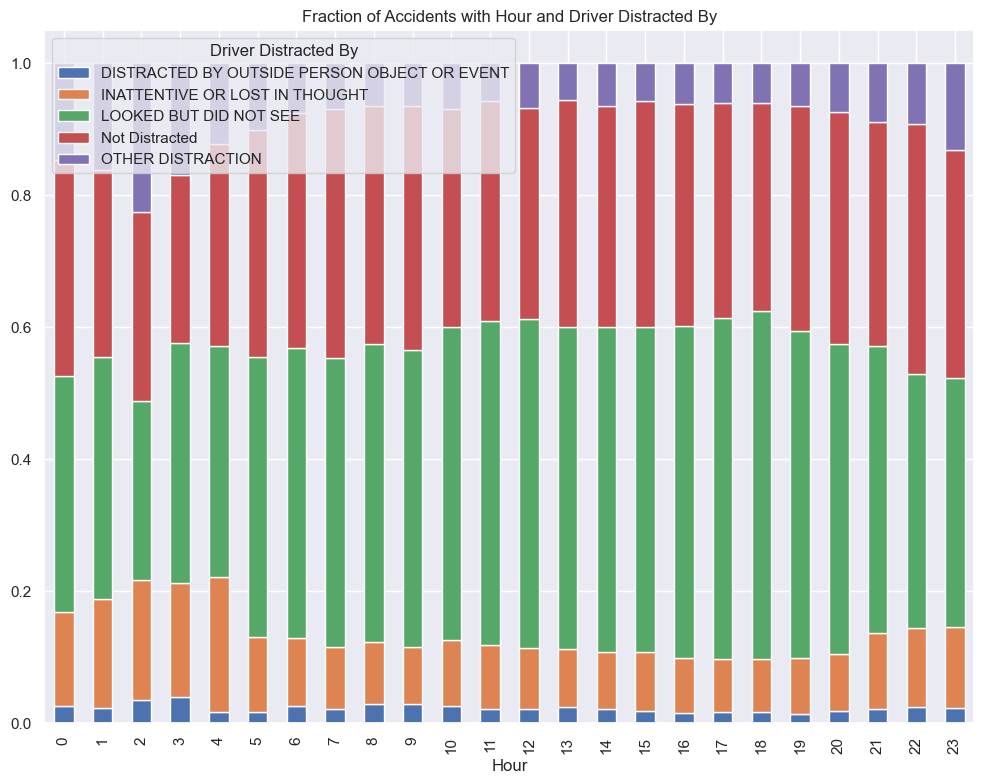

In [25]:
df11=df
top_var1 = df11['hour'].value_counts().index
df11 = df11[df11['hour'].isin(top_var1)]

top_var2 = df11['Driver Distracted By'].value_counts()[1:6].index
df11 = df11[df11['Driver Distracted By'].isin(top_var2)]

tb1 = pd.crosstab(df11['hour'],df11['Driver Distracted By'])
tb1 = tb1.div(df11['hour'].value_counts(), axis=0)
tb1.plot.bar(stacked=True).set(title='Fraction of Accidents with Hour and Driver Distracted By',xlabel='Hour');
